# ML Project on Lead Scoring 

___By Mohammed Faisal Khan___

# Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals and Objectives

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

# Step-1:- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2 : Loading and Cleaning Data

# 2.1 Import Data

In [2]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


# 2.2 Inspect the dataframe

This helps to give a good idea of the dataframes.

In [3]:
# The df.info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# The df.isna()/isnull() code gives the counts of missing values
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
# The df.shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [6]:
#To get an idea of the numeric values, use df.describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2.3 Cleaning the dataframe

In [7]:
# Converting all the values to lower case
df = df.applymap(lambda x:x.lower() if type(x) == str else x)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping unique valued columns
df1=df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [11]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [14]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___

In [15]:
df2['Specialization']=df2['Specialization'].fillna('not provided')
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [17]:
df2['Country'].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
france                     6
oman                       6
unknown                    5
nigeria                    4
south africa               4
canada                     4
kuwait                     4
germany                    4
sweden                     3
netherlands                2
asia/pacific region        2
philippines                2
bangladesh                 2
china                      2
ghana                      2
belgium                    2
uganda                     2
italy                      2
indonesia                  1
switzerland                1
denmark                    1
liberia                    1
tanzania                   1
malaysia      

In [18]:
def slots(x):
    category=''
    if x=='india':
        category='india'
    elif x=='not provided':
        category='not provided'
    else:
        category='outside india'
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [19]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [20]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [21]:
df3 = df2[df2.isnull().sum(axis=1)<1]

In [22]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [23]:
df3.shape[0]

9074

In [24]:
df.shape[0]

9240

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [26]:
df3.shape

(9074, 22)

In [27]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df.index)),2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [28]:
df3.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [29]:
# To familiarize all the categorical values
for i in df3:
    print(df3[i].value_counts())
    print('------------------------------------------------------------------------------------------------------')

c5dd06bc-4117-4a1f-9eef-f2a1cfaa679e    1
b7d79267-44a6-4dd9-8fdc-6f16a3b1d33a    1
0685f3e5-0edc-4753-9d66-564a83b5b028    1
9d219e46-ff74-4230-92ab-9e86385953c4    1
2b309a9f-64f6-4d49-9cc5-6dc88333b70e    1
                                       ..
c4c2fe2b-9b9c-419a-af73-0ffd1cce3520    1
c3a58704-80e2-47ca-b6fe-bdf54b9ef69d    1
ee8a7d9a-d88b-4903-8582-1c4d2301b42a    1
332ed98d-a15f-4be1-8182-e788e28c2c91    1
f78f8821-d74c-411f-81cd-4adece23bcd7    1
Name: Prospect ID, Length: 9074, dtype: int64
------------------------------------------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
------------------------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             

In [30]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',axis=1)
df_final.shape

(9074, 21)

In [31]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


# Step-3:- EDA

**3.1. Univariate Analysis**

**3.1.1. Categorical Variables**

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

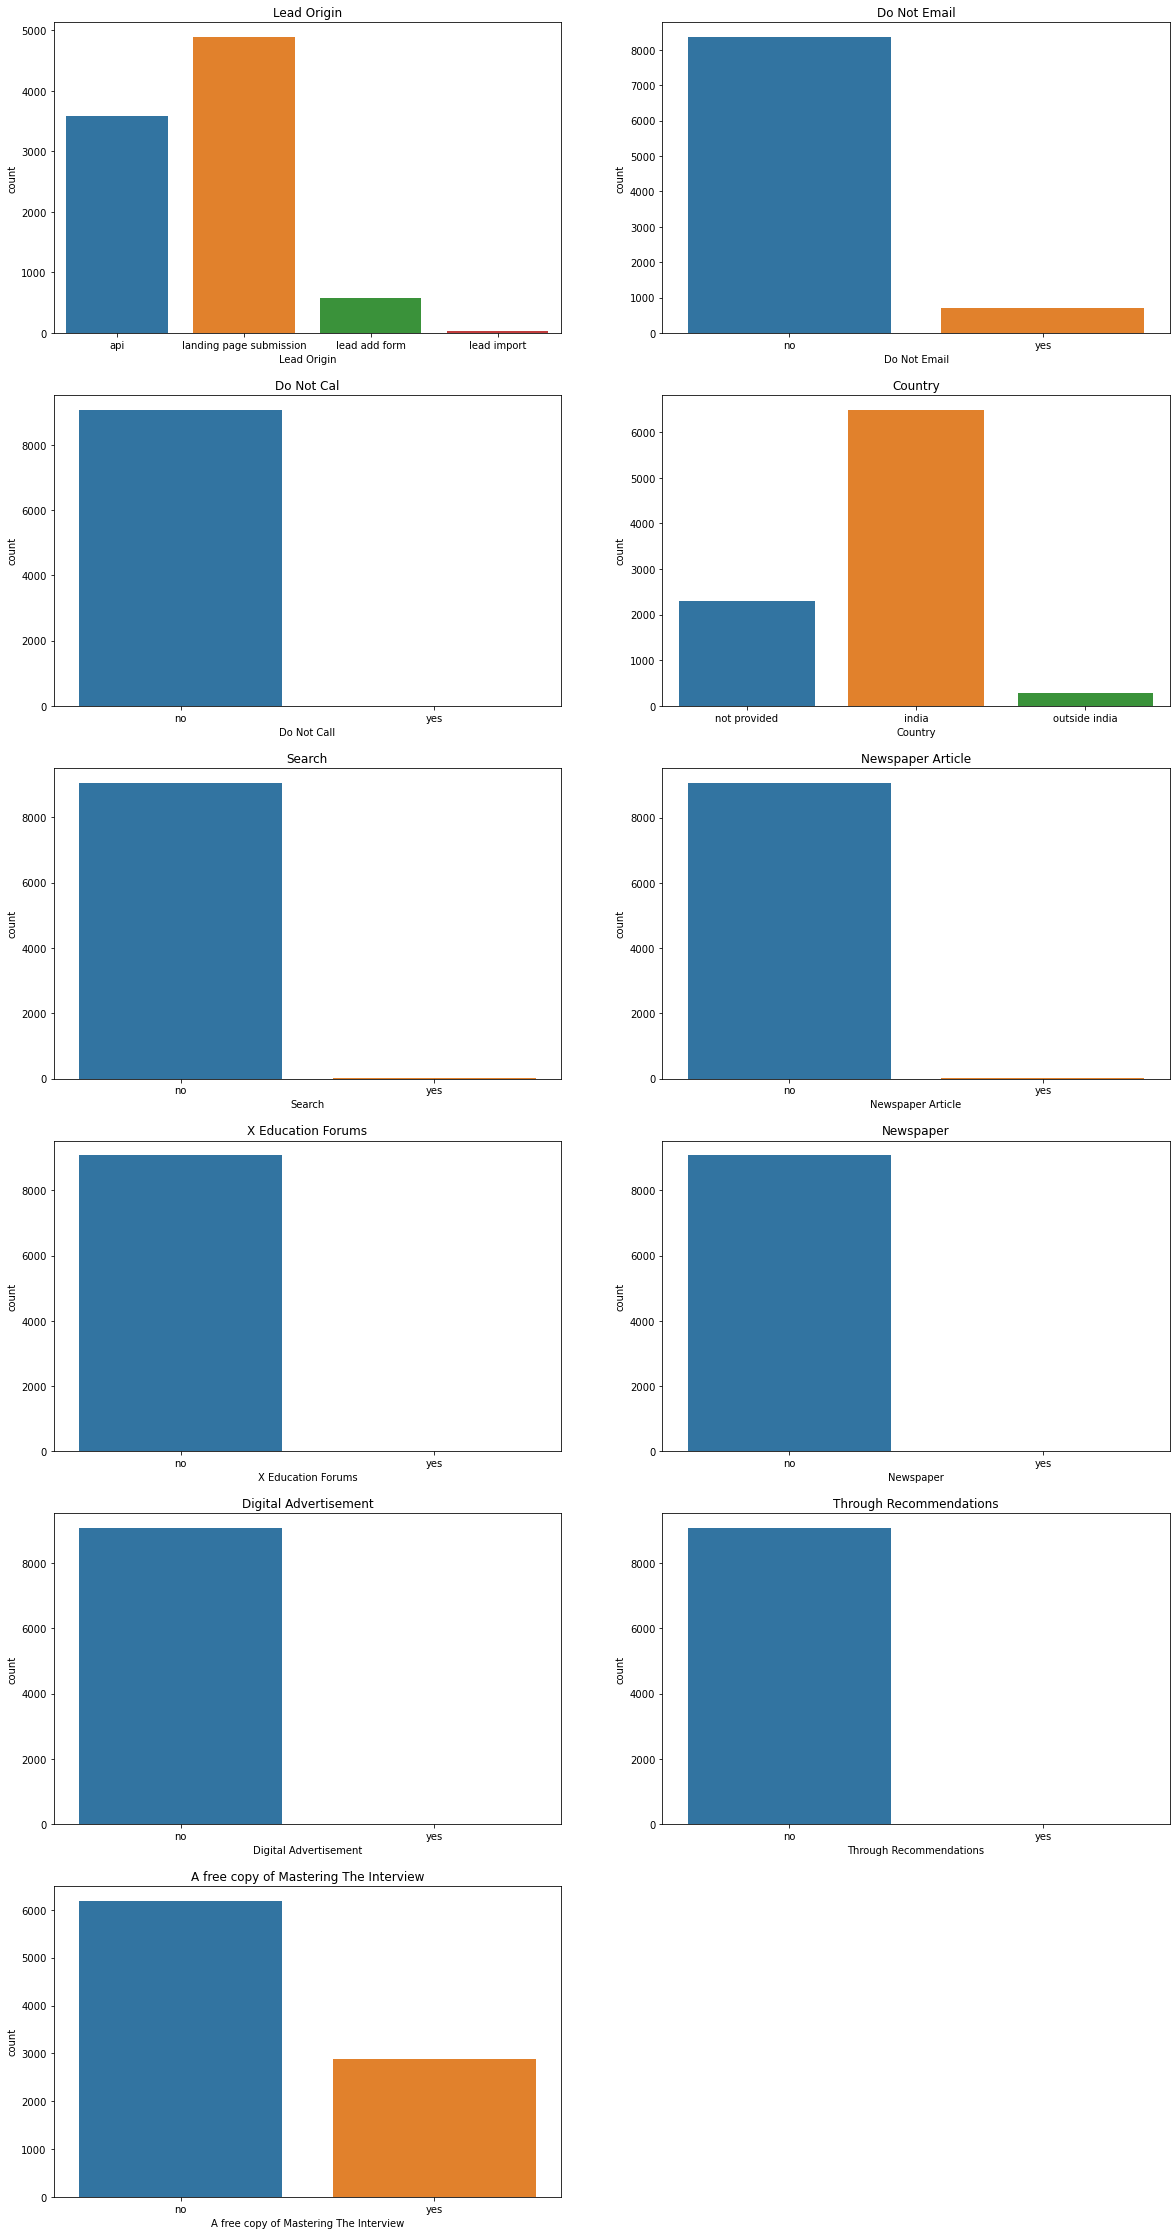

In [33]:
plt.figure(figsize=(20,40))

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Cal')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')


plt.show()

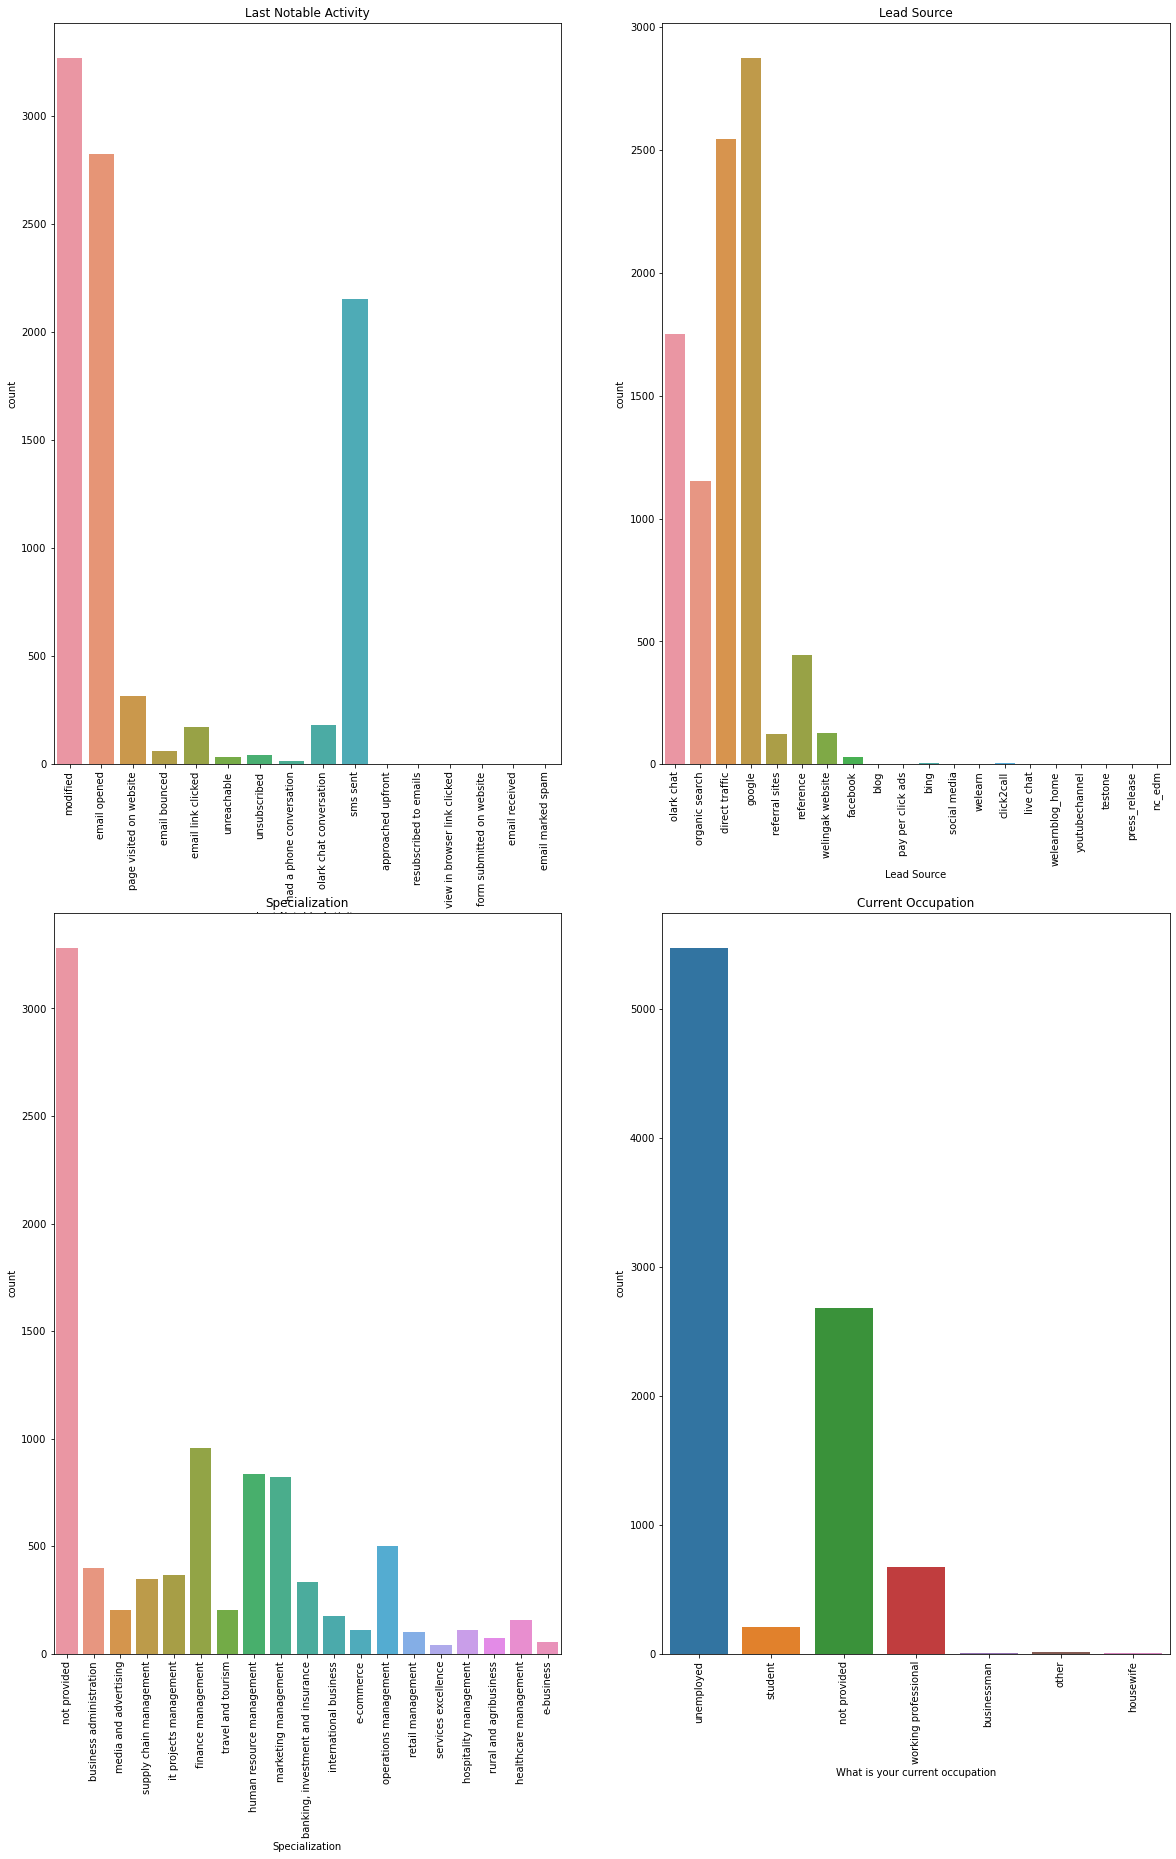

In [34]:
plt.figure(figsize = (20,30))

plt.subplot(2,2,1)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(2,2,2)
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(2,2,3)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,4)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')


plt.show()

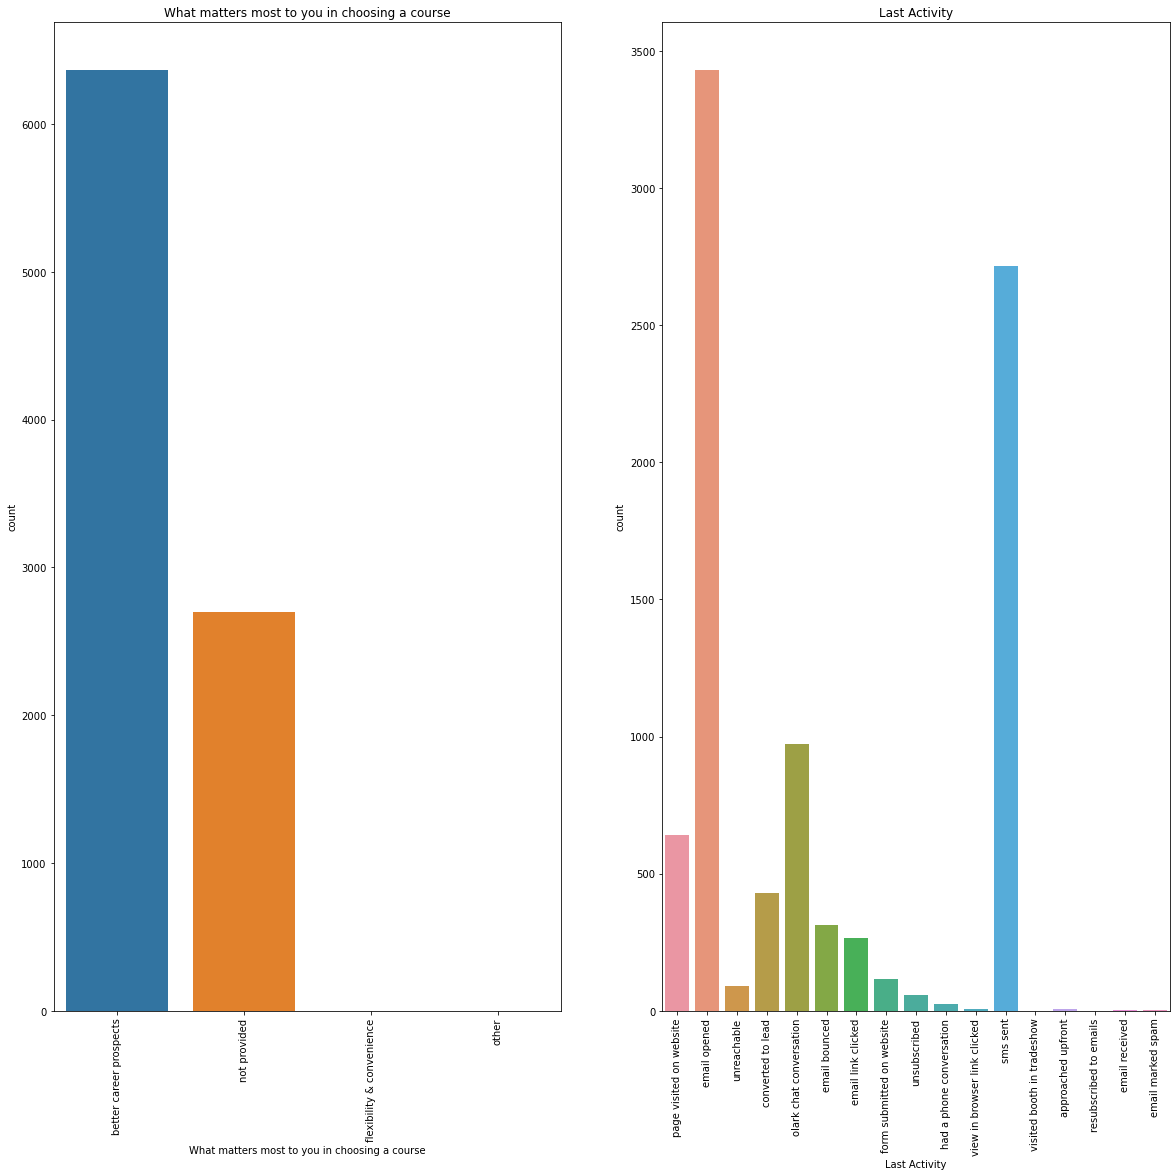

In [35]:
plt.figure(figsize=(20,40))

plt.subplot(2,2,1)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,2)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

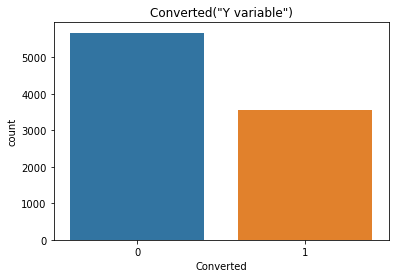

In [36]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

**3.2.1. Numerical Variables**

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

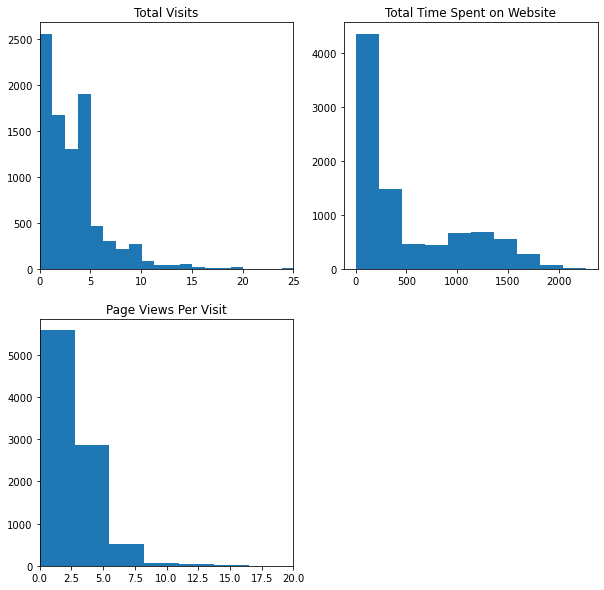

In [38]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins=200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'],bins=10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

**3.1. Relating all the categorical variables to Converted**

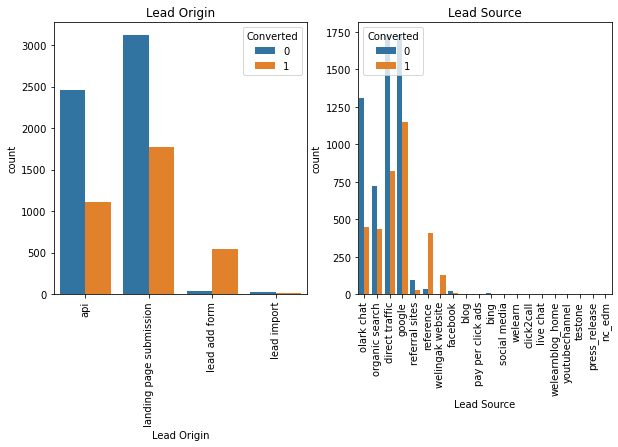

In [39]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin',hue='Converted',data=df_final).tick_params(axis='x',rotation=90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

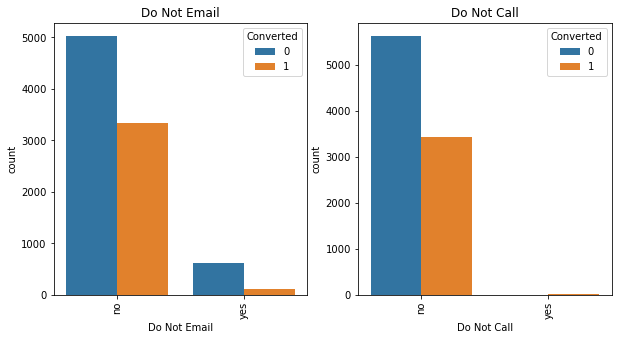

In [40]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email',hue='Converted',data=df_final).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call',hue='Converted',data=df_final).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')

plt.show()

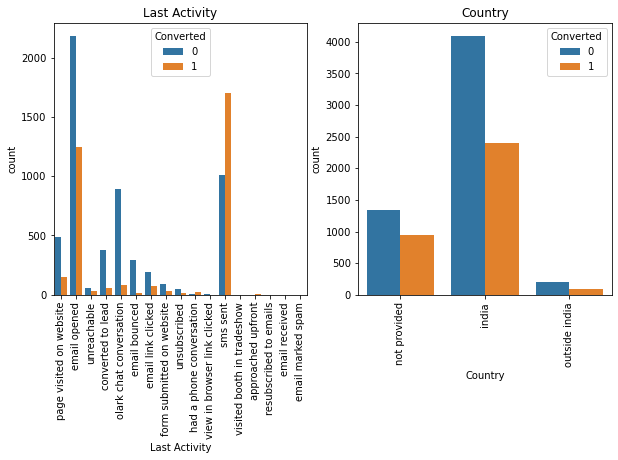

In [41]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity',hue='Converted',data=df_final).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country',hue='Converted',data=df_final).tick_params(axis='x',rotation=90)
plt.title('Country')

plt.show()

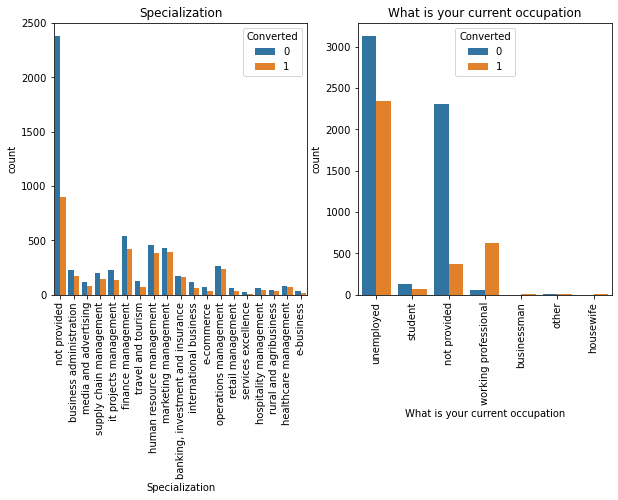

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

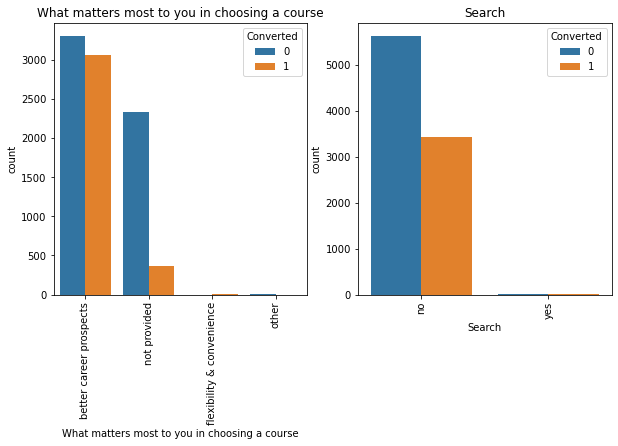

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

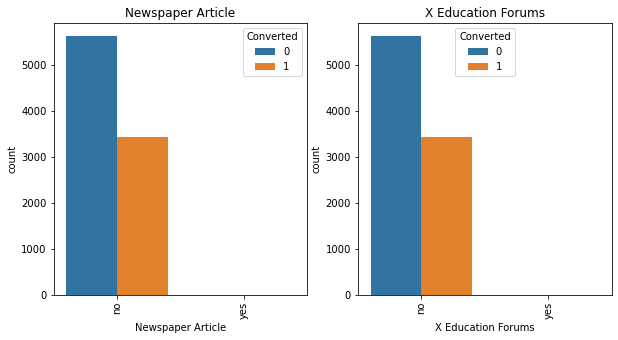

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

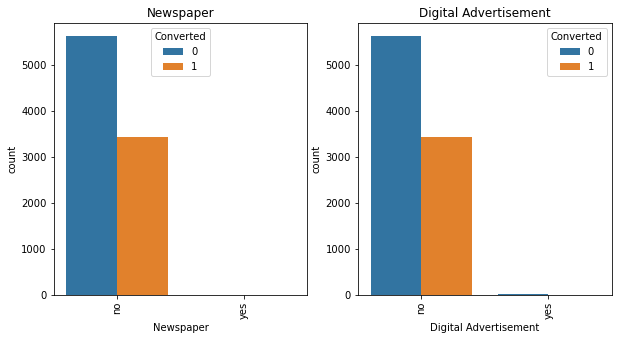

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

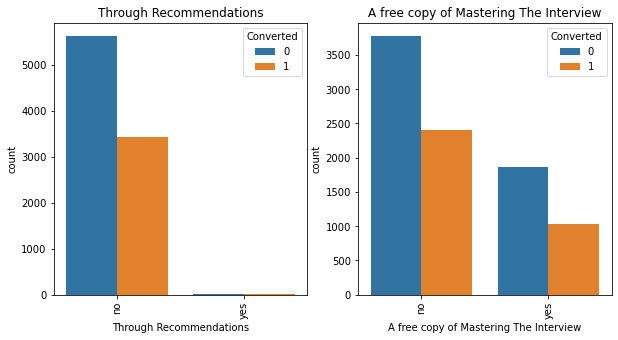

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

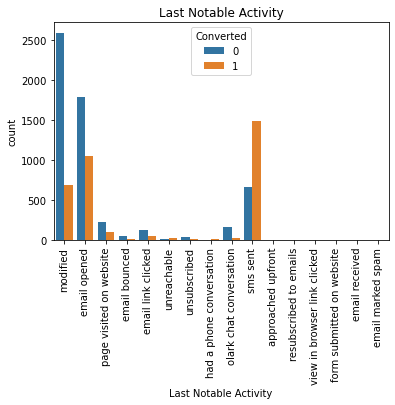

In [47]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

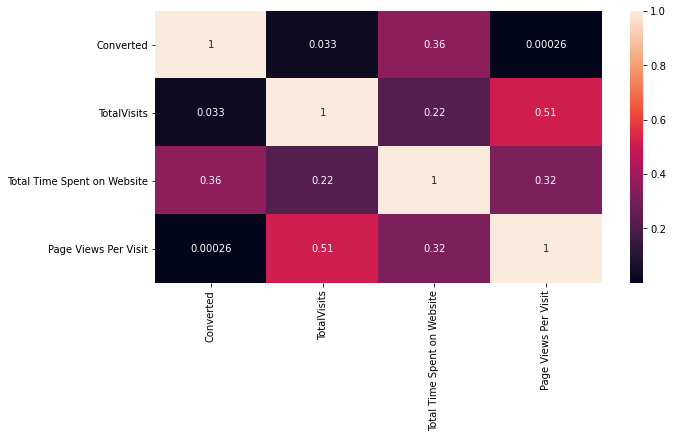

In [48]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___

In [49]:
df_final.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


___There aren't any major outliers, so moving on to analysis___

# 4. Dummy Variables

In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [51]:
cols = df_final.select_dtypes(object).columns

In [52]:
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [54]:
df_final['Lead Origin'].value_counts()

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64

In [55]:
df_final['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
testone                 1
welearn                 1
pay per click ads       1
blog                    1
welearnblog_home        1
youtubechannel          1
nc_edm                  1
Name: Lead Source, dtype: int64

In [56]:
df_final['Do Not Email'].value_counts()

no     8358
yes     716
Name: Do Not Email, dtype: int64

In [57]:
df_final['Last Activity'].value_counts()

email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead                428
email bounced                    312
email link clicked               267
form submitted on website        116
unreachable                       90
unsubscribed                      59
had a phone conversation          25
view in browser link clicked       6
approached upfront                 5
email marked spam                  2
email received                     2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last Activity, dtype: int64

In [58]:
df_final['What is your current occupation'].value_counts()

unemployed              5476
not provided            2683
working professional     677
student                  206
other                     15
housewife                  9
businessman                8
Name: What is your current occupation, dtype: int64

In [59]:
df_final['A free copy of Mastering The Interview'].value_counts()

no     6186
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [60]:
df_final['Last Notable Activity'].value_counts()

modified                        3267
email opened                    2823
sms sent                        2152
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      45
unreachable                       32
had a phone conversation          14
email marked spam                  2
resubscribed to emails             1
approached upfront                 1
email received                     1
form submitted on website          1
view in browser link clicked       1
Name: Last Notable Activity, dtype: int64

In [61]:
df_final['Specialization'].value_counts()

not provided                         3282
finance management                    959
human resource management             837
marketing management                  823
operations management                 499
business administration               399
it projects management                366
supply chain management               346
banking, investment and insurance     335
media and advertising                 202
travel and tourism                    202
international business                176
healthcare management                 156
hospitality management                111
e-commerce                            111
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [62]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [63]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
dummy

,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [65]:
df_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 100 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9074 non-null   object 
 1   Lead Source                                           9074 non-null   object 
 2   Do Not Email                                          9074 non-null   object 
 3   Do Not Call                                           9074 non-null   object 
 4   Converted                                             9074 non-null   int64  
 5   TotalVisits                                           9074 non-null   float64
 6   Total Time Spent on Website                           9074 non-null   int64  
 7   Page Views Per Visit                                  9074 non-null   float64
 8   Last Activity                                         907

In [66]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis = 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# 5. Test-Train Split

In [67]:
#spliting data into x and y
x = df_final_dum.drop(['Converted'],axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
y.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [70]:
# Import the required library
from sklearn.model_selection import train_test_split
# Split the dataset into 70% and 30% for train and test respectively
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [71]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6351, 80)
(2723, 80)
(6351,)
(2723,)


In [72]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit_transform(x)

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   5.,  644.,   47., ...,    0.,    0.,    0.],
       [   2., 1427.,   33., ...,    0.,    0.,    0.],
       ...,
       [   2.,  199.,   33., ...,    0.,    0.,    0.],
       [   3.,  496.,   59., ...,    0.,    0.,    0.],
       [   6., 1196.,   59., ...,    0.,    0.,    0.]])

In [73]:
# Import MinMax scaler
#from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
#scaler = MinMaxScaler()
#xtrain = scaler.fit_transform(xtrain)
#xtest = scaler.fit(xtest)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


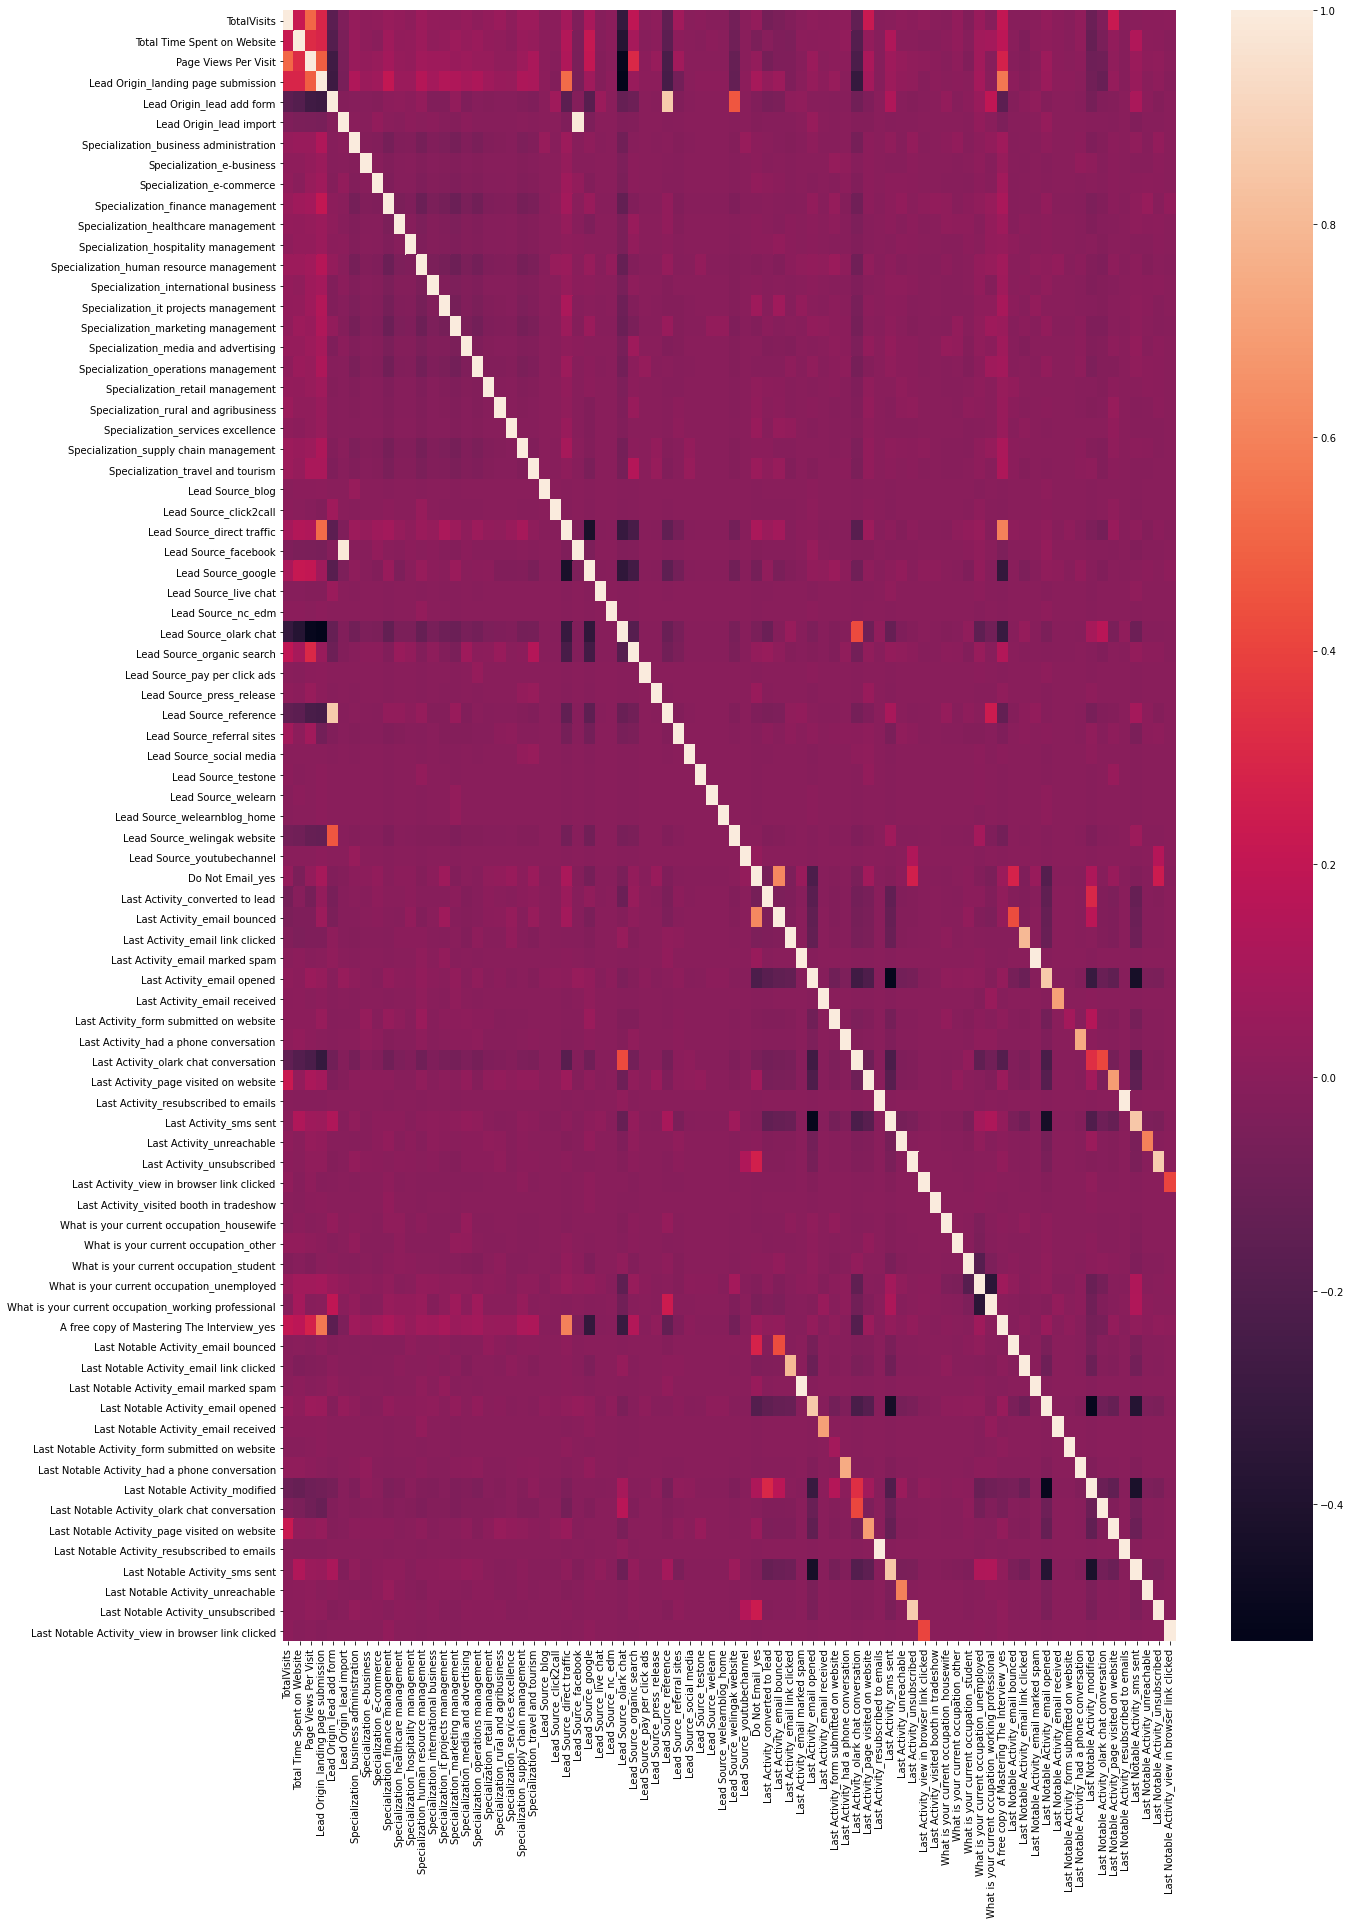

In [74]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(x.corr())
plt.show()

___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___

# 6. Model Building

# 6.1 Model

In [75]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)
acc_log = round(logreg.score(xtest,ytest)*100,2)
acc_log

80.87

In [76]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f'Training Error:- {train}')
print(f'Testing Error:- {test}')

Training Error:- 0.8170366871358841
Testing Error:- 0.808666911494675


In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)


print(f"Accuracy :- {ac}\n \nROC/AUC:- {ra}\n\n {cm}\n {cr}")

Accuracy :- 0.808666911494675
 
ROC/AUC:- 0.7890133979037544

 [[1472  220]
 [ 301  730]]
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1692
           1       0.77      0.71      0.74      1031

    accuracy                           0.81      2723
   macro avg       0.80      0.79      0.79      2723
weighted avg       0.81      0.81      0.81      2723



In [78]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f'Training Error:- {train}')
print(f'Testing Error:- {test}')

Training Error:- 0.8170366871358841
Testing Error:- 0.808666911494675


In [79]:
print(f'Actual Value [0]:-     {ytest[:35].values}')
print(f'Predictes value [1] :- {ypred[:35]}')

Actual Value [0]:-     [1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0]
Predictes value [1] :- [1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0]


In [80]:
logreg.predict_proba(xtest)

array([[0.13488235, 0.86511765],
       [0.82444788, 0.17555212],
       [0.51896742, 0.48103258],
       ...,
       [0.98270167, 0.01729833],
       [0.01385872, 0.98614128],
       [0.93941952, 0.06058048]])

In [81]:
ypredprob = logreg.predict_proba(xtest)[:,1]
ypredprob

array([0.86511765, 0.17555212, 0.48103258, ..., 0.01729833, 0.98614128,
       0.06058048])

In [82]:
from sklearn.preprocessing import binarize
ypred = binarize([ypredprob],threshold=0.30)[0]
ypred

array([1., 0., 1., ..., 0., 1., 0.])

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)


print(f"Accuracy :- {ac}\n \nROC/AUC:- {ra}\n\n {cm}\n {cr}")

Accuracy :- 0.78773411678296
 
ROC/AUC:- 0.7981251418783665

 [[1278  414]
 [ 164  867]]
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1692
           1       0.68      0.84      0.75      1031

    accuracy                           0.79      2723
   macro avg       0.78      0.80      0.78      2723
weighted avg       0.81      0.79      0.79      2723



In [84]:
from sklearn.preprocessing import binarize
ypred = binarize([ypredprob],threshold=0.40)[0]
ypred

array([1., 0., 1., ..., 0., 1., 0.])

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)


print(f"Accuracy :- {ac}\n \nROC/AUC:- {ra}\n\n {cm}\n {cr}")

Accuracy :- 0.7976496511200881
 
ROC/AUC:- 0.7917050741436279

 [[1381  311]
 [ 240  791]]
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1692
           1       0.72      0.77      0.74      1031

    accuracy                           0.80      2723
   macro avg       0.78      0.79      0.79      2723
weighted avg       0.80      0.80      0.80      2723



# 6.2 Model

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_cla = KNeighborsClassifier(n_neighbors=3)
knn_cla.fit(xtrain,ytrain)
ypred = knn_cla.predict(xtest)
acc_knn_cla = round(knn_cla.score(xtest,ytest)*100,2)
acc_knn_cla

77.05

In [87]:
train = knn_cla.score(xtrain,ytrain)
test = knn_cla.score(xtest,ytest)

print(f'Training Error:- {train}')
print(f'Testing Error:- {test}')

Training Error:- 0.8464808691544639
Testing Error:- 0.7704737421961072


In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)


print(f"Accuracy :- {ac}\n \n\n {cm}\n {cr}")

Accuracy :- 0.7704737421961072
 

 [[1403  289]
 [ 336  695]]
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1692
           1       0.71      0.67      0.69      1031

    accuracy                           0.77      2723
   macro avg       0.76      0.75      0.75      2723
weighted avg       0.77      0.77      0.77      2723



In [89]:
train = knn_cla.score(xtrain,ytrain)
test = knn_cla.score(xtest,ytest)

print(f'Training Error:- {train}')
print(f'Testing Error:- {test}')

Training Error:- 0.8464808691544639
Testing Error:- 0.7704737421961072


# 6.3 Model

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
acc_dt = round(dt.score(xtest,ytest)*100,2)
acc_dt

77.63

In [91]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)

print(f'Training Error:-{train}\nTesting Error:-{test}')

Training Error:-0.9746496614706346
Testing Error:-0.7763496143958869


In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)


print(f"Accuracy :- {ac}\n \n\n {cm}\n {cr}")

Accuracy :- 0.7763496143958869
 

 [[1412  280]
 [ 329  702]]
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1692
           1       0.71      0.68      0.70      1031

    accuracy                           0.78      2723
   macro avg       0.76      0.76      0.76      2723
weighted avg       0.77      0.78      0.78      2723



In [93]:
from sklearn.feature_selection import RFE
rfe_dt = RFE(dt,15)
rfe_dt.fit(xtrain,ytrain)
ypred = rfe_dt.predict(xtest)
acc_rfe_dt = round(rfe_dt.score(xtest,ytest)*100,2)
acc_rfe_dt

76.9

In [94]:
train = rfe_dt.score(xtrain,ytrain)
test = rfe_dt.score(xtest,ytest)

print(f'Training Error:-{train}\nTesting Error:-{test}')

Training Error:-0.9692961738308927
Testing Error:-0.7690047741461623


In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)


print(f"Accuracy :- {ac}\n \n\n {cm}\n {cr}")

Accuracy :- 0.7690047741461623
 

 [[1381  311]
 [ 318  713]]
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1692
           1       0.70      0.69      0.69      1031

    accuracy                           0.77      2723
   macro avg       0.75      0.75      0.75      2723
weighted avg       0.77      0.77      0.77      2723



In [96]:
parameters = {
             "criterion":["gini","entropy"],
             "max_depth":list(range(1,20)),
             "min_samples_leaf":list(range(1,20))
}

In [97]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [98]:
grid.best_score_

0.8302632312581698

In [99]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=16)

In [100]:
dtree = grid.best_estimator_
dtree.fit(xtrain,ytrain)
ypred = dtree.predict(xtest)
acc_dtree = round(dtree.score(xtest,ytest)*100,2)
acc_dtree

82.41

In [101]:
train = dtree.score(xtrain,ytrain)
test = dtree.score(xtest,ytest)

print(f'Training Error:-{train}\nTesting Error:-{test}')

Training Error:-0.8357738938749804
Testing Error:-0.8240910760190966


In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)


print(f"Accuracy :- {ac}\n {cm}\n {cr}")

Accuracy :- 0.8240910760190966
 [[1483  209]
 [ 270  761]]
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1692
           1       0.78      0.74      0.76      1031

    accuracy                           0.82      2723
   macro avg       0.82      0.81      0.81      2723
weighted avg       0.82      0.82      0.82      2723



# 6.4 Model

In [103]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)
acc_svm = round(svm.score(xtest,ytest)*100,2)
acc_svm

72.97

In [104]:
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)

print(f'Training Error:-{train}\nTesting Error:-{test}')

Training Error:-0.7334278066446229
Testing Error:-0.7297098788101358


In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[('scaler',StandardScaler()),('svm',SVC())])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)


print(f"Accuracy :- {ac}\n {cm}\n {cr}")

Accuracy :- 0.821520381931693
 [[1506  186]
 [ 300  731]]
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1692
           1       0.80      0.71      0.75      1031

    accuracy                           0.82      2723
   macro avg       0.82      0.80      0.81      2723
weighted avg       0.82      0.82      0.82      2723



In [106]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.001,0.01,1,10,100],
              'gamma':[0.001,0.01,1,10,100],
              'kernel':['rbf']
             }

In [107]:
grid = GridSearchCV(SVC(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   2.8s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   2.2s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .......................C=0.001, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100],
                         'kernel': ['rbf']},
             verbose=2)

In [108]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [109]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [110]:
svm_grid = grid.best_estimator_
svm_grid.fit(xtrain,ytrain)
ypred = svm_grid.predict(xtest)
acc_svm_grid = round(svm_grid.score(xtest,ytest)*100,2)
acc_svm_grid

81.16

In [111]:
train = svm_grid.score(xtrain,ytrain)
test = svm_grid.score(xtest,ytest)

print(f'Training Error:-{train}\nTesting Error:-{test}')

Training Error:-0.863171154148953
Testing Error:-0.8116048475945649


In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)


print(f"Accuracy :- {ac}\n {cm}\n {cr}")

Accuracy :- 0.8116048475945649
 [[1456  236]
 [ 277  754]]
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1692
           1       0.76      0.73      0.75      1031

    accuracy                           0.81      2723
   macro avg       0.80      0.80      0.80      2723
weighted avg       0.81      0.81      0.81      2723



# 6.5 Model

In [113]:
models = []
accuracy = []

models.append(('logreg',LogisticRegression()))
models.append(('Knn_cla',KNeighborsClassifier(n_neighbors=3)))
models.append(('DT',DecisionTreeClassifier()))
models.append(('DT.e',DecisionTreeClassifier(criterion='entropy')))
models.append(('SVM',SVC(kernel='rbf')))

for name,model in models:
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    accuracy.append(ac)
    
arr = np.array(accuracy)
print(f'Avg Accuracy:- {arr.mean()}')

Avg Accuracy:- 0.7746603011384502


In [114]:
models

[('logreg', LogisticRegression()),
 ('Knn_cla', KNeighborsClassifier(n_neighbors=3)),
 ('DT', DecisionTreeClassifier()),
 ('DT.e', DecisionTreeClassifier(criterion='entropy')),
 ('SVM', SVC())]

In [115]:
accuracy

[0.808666911494675,
 0.7704737421961072,
 0.7818582445831803,
 0.7825927286081528,
 0.7297098788101358]

In [116]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)


train=vc.score(xtrain,ytrain)
test=vc.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.9196976854038734
Testing Error:-0.8244583180315828


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1692
           1       0.77      0.76      0.77      1031

    accuracy                           0.82      2723
   macro avg       0.81      0.81      0.81      2723
weighted avg       0.82      0.82      0.82      2723



In [117]:
acc_vc = round(vc.score(xtest,ytest)*100,2)
acc_vc

82.45

In [118]:
acc_ensemble = round(arr.mean()*100,2)
acc_ensemble

77.47

In [119]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(LogisticRegression(),n_estimators=10)
bc.fit(xtrain,ytrain)
ypred = bc.predict(xtest)
acc_bc = round(bc.score(xtest,ytest)*100,2)
acc_bc

80.9

In [120]:
train = bc.score(xtrain,ytrain)
test = bc.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')

Training Error:-0.8178239647299638
Testing Error:-0.8090341535071612


In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)


print(f"Accuracy :- {ac}\n {cm}\n {cr}")

Accuracy :- 0.8090341535071612
 [[1477  215]
 [ 305  726]]
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1692
           1       0.77      0.70      0.74      1031

    accuracy                           0.81      2723
   macro avg       0.80      0.79      0.79      2723
weighted avg       0.81      0.81      0.81      2723



In [122]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(KNeighborsClassifier(n_neighbors=3),n_estimators=10)
bc.fit(xtrain,ytrain)
ypred = bc.predict(xtest)
acc_bc_knn = round(bc.score(xtest,ytest)*100,2)
acc_bc_knn

train = bc.score(xtrain,ytrain)
test = bc.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.8601794992914502
Testing Error:-0.7781858244583181


              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1692
           1       0.72      0.68      0.70      1031

    accuracy                           0.78      2723
   macro avg       0.77      0.76      0.76      2723
weighted avg       0.78      0.78      0.78      2723



In [123]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)
bc.fit(xtrain,ytrain)
ypred = bc.predict(xtest)
acc_bc_DT = round(bc.score(xtest,ytest)*100,2)
acc_bc_DT

train = bc.score(xtrain,ytrain)
test = bc.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.9595339316643048
Testing Error:-0.8046272493573264


              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1692
           1       0.77      0.68      0.73      1031

    accuracy                           0.80      2723
   macro avg       0.80      0.78      0.79      2723
weighted avg       0.80      0.80      0.80      2723



In [124]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=10)
bc.fit(xtrain,ytrain)
ypred = bc.predict(xtest)
acc_bc_DT_ = round(bc.score(xtest,ytest)*100,2)
acc_bc_DT_

train = bc.score(xtrain,ytrain)
test = bc.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.9581168319949614
Testing Error:-0.8127065736320235


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1692
           1       0.78      0.70      0.74      1031

    accuracy                           0.81      2723
   macro avg       0.81      0.79      0.80      2723
weighted avg       0.81      0.81      0.81      2723



In [125]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(SVC(kernel='rbf'),n_estimators=10)
bc.fit(xtrain,ytrain)
ypred = bc.predict(xtest)
acc_bc_svc = round(bc.score(xtest,ytest)*100,2)
acc_bc_svc

train = bc.score(xtrain,ytrain)
test = bc.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.733112895606991
Testing Error:-0.7300771208226221


              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1692
           1       0.68      0.54      0.60      1031

    accuracy                           0.73      2723
   macro avg       0.72      0.69      0.70      2723
weighted avg       0.72      0.73      0.72      2723



# 6.6 Model

In [126]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [127]:
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
acc_ada = round(ada.score(xtest,ytest)*100,2)

train = ada.score(xtrain,ytrain)
test = ada.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.8326247834986616
Testing Error:-0.8233565919941241


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1692
           1       0.79      0.73      0.76      1031

    accuracy                           0.82      2723
   macro avg       0.82      0.81      0.81      2723
weighted avg       0.82      0.82      0.82      2723



In [128]:
gra = GradientBoostingClassifier()
gra.fit(xtrain,ytrain)
ypred = gra.predict(xtest)
acc_gra = round(gra.score(xtest,ytest)*100,2)

train = gra.score(xtrain,ytrain)
test = gra.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.8482128798614391
Testing Error:-0.8281307381564451


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1692
           1       0.79      0.74      0.77      1031

    accuracy                           0.83      2723
   macro avg       0.82      0.81      0.81      2723
weighted avg       0.83      0.83      0.83      2723



# 6.7 Model

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
acc_rfc = round(rfc.score(xtest,ytest)*100,2)

train = rfc.score(xtrain,ytrain)
test = rfc.score(xtest,ytest)
print(f'Training Error:-{train}\nTesting Error:-{test}')
print()
print()
print(classification_report(ytest,ypred))

Training Error:-0.9746496614706346
Testing Error:-0.8145427836944547


              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1692
           1       0.77      0.72      0.75      1031

    accuracy                           0.81      2723
   macro avg       0.81      0.80      0.80      2723
weighted avg       0.81      0.81      0.81      2723



In [130]:
report_1 = pd.DataFrame({
    'Model':['Logistic Regression','KNN-CLassifier','DecisionTreeCLassifier','DT-GridSearchCV','SVM','SVM-GridSearchCV','Ensemble','Ensemble-VC','Ensemble-BC-Logistic Regression','Ensemble-BC-KNN Classifier','Ensemble-BC-DecisionTreeClassifier','Ensemble-BC-DecisionTreeClassifier-entropy','Ensemble-BC-SVC','Ensemble-AdaBoostClassifier','Ensemble-GradientBoostingClassifier','Ensemble-RandomForestClassifier'],
    'Score':[acc_log,acc_knn_cla,acc_dt,acc_dtree,acc_svm,acc_svm_grid,acc_ensemble,acc_vc,acc_bc,acc_bc_knn,acc_bc_DT,acc_bc_DT_,acc_bc_svc,acc_ada,acc_gra,acc_rfc]
})

In [131]:
report_1

,Model,Score
0,Logistic Regression,80.87
1,KNN-CLassifier,77.05
2,DecisionTreeCLassifier,77.63
3,DT-GridSearchCV,82.41
4,SVM,72.97
5,SVM-GridSearchCV,81.16
6,Ensemble,77.47
7,Ensemble-VC,82.45
8,Ensemble-BC-Logistic Regression,80.90
9,Ensemble-BC-KNN Classifier,77.82


In [132]:
#Logistic Regression Model is Best-fitted and after doing ROC_AUC Accuracy is low
#Knn-Classifier Model is Over-fitted Low Bias and High Variance
#Decision-Tree_Classifier Model is Over-fitted But after doing GridSearchCV Decision-Tree-Classifier is Best-fitted and the Accuracy is also Good.
#SVM Model is Best-fitted and after doing the GridSearchCV SVM is still Best-fitted but Accuracy is little is less

In [133]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
xtrain[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(xtrain[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
xtrain.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1003,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2875,0.043825,0.198562,0.100000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4411,0.011952,0.438904,0.054545,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2028,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3865,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Step-7:- RFE

# 7.1 Model

In [134]:
#Import RFE
from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(xtrain, ytrain)

In [135]:
# Features that have been selected by RFE
list(zip(xtrain.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 30),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 48),
 ('Specialization_business administration', False, 39),
 ('Specialization_e-business', False, 28),
 ('Specialization_e-commerce', False, 27),
 ('Specialization_finance management', False, 37),
 ('Specialization_healthcare management', False, 32),
 ('Specialization_hospitality management', False, 14),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 41),
 ('Specialization_it projects management', False, 33),
 ('Specialization_marketing management', False, 29),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 34),
 ('Specialization_retail management', False, 60),
 ('Specialization_rural and agribusiness', False, 36),
 ('Specialization_serv

In [136]:
xtrain.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_lead add form', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unreachable',
       'Last Notable Activity_unsubscribed'],
      dtype='object')

In [137]:
# Put all the columns selected by RFE in the variable 'col'
col = xtrain.columns[rfe.support_]

___All the variables selected by RFE, next statistics part (p-values and the VIFs).___

In [138]:
# Selecting columns selected by RFE
xtrain = xtrain[col]

In [139]:
# Importing statsmodels
import statsmodels.api as sm

In [140]:
xtrain_sm = sm.add_constant(xtrain)
logm1 = sm.GLM(ytrain,xtrain_sm,family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.8
Date:                Mon, 27 Mar 2023   Deviance:                       5355.6
Time:                        00:15:14   Pearson chi2:                 6.41e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6828      0.071    -23.806      0.000      -1.821      -1.544
Total Time Spent on Website                              4.0842      0.150     27.232      0.000       3.790       4.378
Page Views Per Visit                                    -6.9427      1.045     -6.644      0.000      -8.991      -4.895
Lead Origin_lead add form                                3.3433      0.239     13.967      0.000       2.874       3.812
Lead Source_welingak website                             2.6258      1.059      2.479      0.013       0.550       4.702
Do Not Email_yes                                        -1.5161      0.208     -7.278      0.000      -1.924      -1.108
Last Activity_converted to lead                         -1.3185      0.206     -6.398      0.000      -1.722      -0.915
Last Activity_email bounced                             -1.4560      0.457     -3.186      0.001      -2.352      -0.560
Last Activity_had a phone conversation                   1.0657      0.920      1.159      0.247      -0.737       2.868
Last Activity_olark chat conversation                   -1.1682      0.154     -7.608      0.000      -1.469      -0.867
What is your current occupation_housewife               21.2594   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
What is your current occupation_working professional     2.9585      0.198     14.933      0.000       2.570       3.347
Last Notable Activity_had a phone conversation           2.3102      1.433      1.612      0.107      -0.499       5.120
Last Notable Activity_sms sent                           1.5579      0.080     19.393      0.000       1.400       1.715
Last Notable Activity_unreachable                        1.9816      0.505      3.922      0.000       0.991       2.972
Last Notable Activity_unsubscribed                       1.7896      0.493      3.631      0.000       0.824       2.755
========================================================================================================================
"""

In [141]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = xtrain.columns
vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_had a phone conversation,2.34
11,Last Notable Activity_had a phone conversation,2.33
4,Do Not Email_yes,1.95
0,Total Time Spent on Website,1.88
1,Page Views Per Visit,1.86
6,Last Activity_email bounced,1.76
2,Lead Origin_lead add form,1.42
12,Last Notable Activity_sms sent,1.36
3,Lead Source_welingak website,1.29
10,What is your current occupation_working profes...,1.19


___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_housewife'___

In [143]:
xtrain.drop('What is your current occupation_housewife',axis=1,inplace=True)

In [144]:
# Refit the model with the new set of features
xtrain_sm = sm.add_constant(xtrain)
logm2 = sm.GLM(ytrain,xtrain_sm,family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.5
Date:                Mon, 27 Mar 2023   Deviance:                       5361.0
Time:                        00:15:16   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6802      0.071    -23.785      0.000      -1.819      -1.542
Total Time Spent on Website                              4.0894      0.150     27.269      0.000       3.795       4.383
Page Views Per Visit                                    -6.9592      1.045     -6.661      0.000      -9.007      -4.912
Lead Origin_lead add form                                3.3581      0.239     14.043      0.000       2.889       3.827
Lead Source_welingak website                             2.6101      1.059      2.464      0.014       0.534       4.686
Do Not Email_yes                                        -1.5177      0.208     -7.285      0.000      -1.926      -1.109
Last Activity_converted to lead                         -1.3221      0.206     -6.415      0.000      -1.726      -0.918
Last Activity_email bounced                             -1.4584      0.457     -3.191      0.001      -2.354      -0.563
Last Activity_had a phone conversation                   1.0620      0.920      1.154      0.249      -0.742       2.866
Last Activity_olark chat conversation                   -1.1714      0.154     -7.629      0.000      -1.472      -0.870
What is your current occupation_working professional     2.9566      0.198     14.921      0.000       2.568       3.345
Last Notable Activity_had a phone conversation           2.3118      1.434      1.612      0.107      -0.498       5.122
Last Notable Activity_sms sent                           1.5550      0.080     19.358      0.000       1.398       1.712
Last Notable Activity_unreachable                        1.9792      0.505      3.917      0.000       0.989       2.970
Last Notable Activity_unsubscribed                       1.7882      0.493      3.628      0.000       0.822       2.754
========================================================================================================================
"""

___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity_had a phone conversation'___

In [145]:
xtrain.drop('Last Notable Activity_had a phone conversation',axis=1,inplace=True)

In [146]:
# Refit the model with the new set of features
xtrain_sm = sm.add_constant(xtrain)
logm3 = sm.GLM(ytrain,xtrain_sm,family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.0
Date:                Mon, 27 Mar 2023   Deviance:                       5363.9
Time:                        00:15:16   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6811      0.071    -23.799      0.000      -1.820      -1.543
Total Time Spent on Website                              4.0862      0.150     27.262      0.000       3.792       4.380
Page Views Per Visit                                    -6.9184      1.044     -6.630      0.000      -8.964      -4.873
Lead Origin_lead add form                                3.3570      0.239     14.036      0.000       2.888       3.826
Lead Source_welingak website                             2.6132      1.059      2.467      0.014       0.537       4.689
Do Not Email_yes                                        -1.5250      0.208     -7.327      0.000      -1.933      -1.117
Last Activity_converted to lead                         -1.3213      0.206     -6.413      0.000      -1.725      -0.917
Last Activity_email bounced                             -1.4514      0.457     -3.176      0.001      -2.347      -0.556
Last Activity_had a phone conversation                   2.2579      0.646      3.495      0.000       0.992       3.524
Last Activity_olark chat conversation                   -1.1707      0.154     -7.625      0.000      -1.472      -0.870
What is your current occupation_working professional     2.9554      0.198     14.913      0.000       2.567       3.344
Last Notable Activity_sms sent                           1.5550      0.080     19.360      0.000       1.398       1.712
Last Notable Activity_unreachable                        1.9786      0.505      3.915      0.000       0.988       2.969
Last Notable Activity_unsubscribed                       1.7949      0.493      3.642      0.000       0.829       2.761
========================================================================================================================
"""

In [147]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = xtrain.columns
vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_yes,1.95
0,Total Time Spent on Website,1.88
1,Page Views Per Visit,1.86
6,Last Activity_email bounced,1.76
2,Lead Origin_lead add form,1.41
10,Last Notable Activity_sms sent,1.36
3,Lead Source_welingak website,1.29
9,What is your current occupation_working profes...,1.18
12,Last Notable Activity_unsubscribed,1.12
5,Last Activity_converted to lead,1.03


___The VIF values seem fine but the p-values aren't. So removing 'Lead Source_welingak website'___

In [148]:
xtrain.drop('Lead Source_welingak website',axis=1,inplace=True)

In [149]:
# Refit the model with the new set of features
xtrain_sm = sm.add_constant(xtrain)
logm4 = sm.GLM(ytrain,xtrain_sm,family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.1
Date:                Mon, 27 Mar 2023   Deviance:                       5376.2
Time:                        00:15:16   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6831      0.071    -23.828      0.000      -1.821      -1.545
Total Time Spent on Website                              4.0836      0.150     27.265      0.000       3.790       4.377
Page Views Per Visit                                    -6.9105      1.043     -6.625      0.000      -8.955      -4.866
Lead Origin_lead add form                                3.7332      0.233     16.052      0.000       3.277       4.189
Do Not Email_yes                                        -1.4877      0.204     -7.289      0.000      -1.888      -1.088
Last Activity_converted to lead                         -1.3180      0.206     -6.400      0.000      -1.722      -0.914
Last Activity_email bounced                             -1.3946      0.442     -3.156      0.002      -2.261      -0.529
Last Activity_had a phone conversation                   2.2545      0.646      3.491      0.000       0.989       3.520
Last Activity_olark chat conversation                   -1.1649      0.153     -7.609      0.000      -1.465      -0.865
What is your current occupation_working professional     2.9455      0.198     14.860      0.000       2.557       3.334
Last Notable Activity_sms sent                           1.5569      0.080     19.397      0.000       1.400       1.714
Last Notable Activity_unreachable                        1.9789      0.505      3.918      0.000       0.989       2.969
Last Notable Activity_unsubscribed                       1.7599      0.491      3.583      0.000       0.797       2.722
========================================================================================================================
"""

In [150]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = xtrain.columns
vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Do Not Email_yes,1.94
0,Total Time Spent on Website,1.88
1,Page Views Per Visit,1.86
5,Last Activity_email bounced,1.76
9,Last Notable Activity_sms sent,1.36
8,What is your current occupation_working profes...,1.16
11,Last Notable Activity_unsubscribed,1.12
2,Lead Origin_lead add form,1.11
4,Last Activity_converted to lead,1.03
7,Last Activity_olark chat conversation,1.02


___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___

# 8. Creating Prediction

In [151]:
# Predicting the probabilities on the train set
ytrain_pred = res.predict(xtrain_sm)
ytrain_pred

1003    0.156691
2875    0.173180
4411    0.784009
2028    0.156691
3865    0.054789
          ...   
6131    0.137503
9028    0.156691
1351    0.490484
4931    0.401449
3599    0.052668
Length: 6351, dtype: float64

In [152]:
# Reshaping to an array
ytrain_pred = ytrain_pred.values.reshape(-1)
ytrain_pred

array([0.15669131, 0.17317973, 0.78400857, ..., 0.49048403, 0.40144888,
       0.05266825])

In [153]:
ytrain.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [154]:
# Data frame with given convertion rate and probablity of predicted ones
ytrain_pred_final = pd.DataFrame({'Converted':ytrain.values,'Conversion_Prob':ytrain_pred})
ytrain_pred_final

,Converted,Conversion_Prob
0,1,0.156691
1,1,0.173180
2,1,0.784009
3,0,0.156691
4,0,0.054789
...,...,...
6346,0,0.137503
6347,1,0.156691
6348,0,0.490484
6349,0,0.401449


In [155]:
# Substituting 0 or 1 with the cut off as 0.5
ytrain_pred_final['Predicted']=ytrain_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
ytrain_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.156691,0
1,1,0.173180,0
2,1,0.784009,1
3,0,0.156691,0
4,0,0.054789,0


# 9. Model Evaluation

In [156]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [157]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(ytrain_pred_final['Converted'],ytrain_pred_final['Predicted'])
confusion

array([[3496,  451],
       [ 815, 1589]], dtype=int64)

In [158]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [159]:
# Check the overall accuracy
metrics.accuracy_score(ytrain_pred_final.Converted, ytrain_pred_final.Predicted)

0.8006613131790269

**___That's around 80% accuracy with is a very good value___**

In [160]:
# Substituting the value of true positive
TP = confusion[1,1]
TP

1589

In [161]:
# Substituting the value of true negatives
TN = confusion[0,0]
TN

3496

In [162]:
# Substituting the value of false positives
FP = confusion[0,1] 
FP

451

In [163]:
# Substituting the value of false negatives
FN = confusion[1,0]
FN

815

In [164]:
# Calculating the sensitivity
TP/(TP+FN)

0.660981697171381

In [165]:
# Calculating the specificity
TN/(TN+FP)

0.8857360020268559

___With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 66% and specificity of around 88%.___

# 10. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [166]:
# ROC function
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [167]:
fpr,tpr,thresholds = metrics.roc_curve(ytrain_pred_final['Converted'],ytrain_pred_final['Conversion_Prob'],drop_intermediate = False)

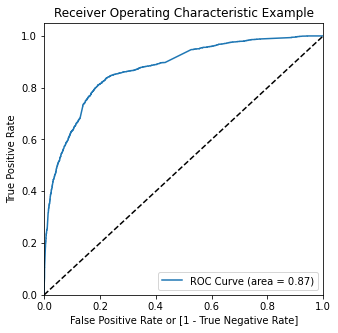

In [168]:
# Call the ROC function
draw_roc(ytrain_pred_final['Converted'],ytrain_pred_final['Conversion_Prob'])

___The area under ROC curve is 0.87 which is a very good value.___

In [169]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    ytrain_pred_final[i]=ytrain_pred_final['Conversion_Prob'].map(lambda x: 1 if x > i else 0 )

ytrain_pred_final

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.156691,0,1,1,0,0,0,0,0,0,0,0
1,1,0.173180,0,1,1,0,0,0,0,0,0,0,0
2,1,0.784009,1,1,1,1,1,1,1,1,1,0,0
3,0,0.156691,0,1,1,0,0,0,0,0,0,0,0
4,0,0.054789,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.137503,0,1,1,0,0,0,0,0,0,0,0
6347,1,0.156691,0,1,1,0,0,0,0,0,0,0,0
6348,0,0.490484,0,1,1,1,1,1,0,0,0,0,0
6349,0,0.401449,0,1,1,1,1,1,0,0,0,0,0


In [170]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(ytrain_pred_final['Converted'],ytrain_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.378523,1.000000,0.000000
0.1,0.1,0.553456,0.979201,0.294147
0.2,0.2,0.753740,0.866473,0.685077
0.3,0.3,0.800189,0.834859,0.779073
0.4,0.4,0.810266,0.787022,0.824424
0.5,0.5,0.800661,0.660982,0.885736
0.6,0.6,0.793733,0.573627,0.927793
0.7,0.7,0.780350,0.494592,0.954396
0.8,0.8,0.758936,0.406406,0.973651
0.9,0.9,0.707920,0.242097,0.991639


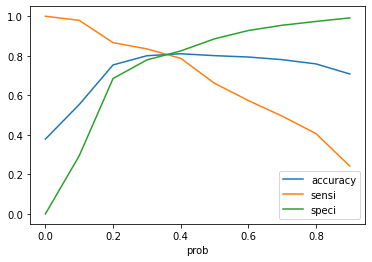

In [171]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

___From the graph it is visible that the optimal cut off is at 0.35.___

In [172]:
ytrain_pred_final['Final_Predicted']=ytrain_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.35 else 0 )
ytrain_pred_final

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.156691,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.173180,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.784009,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.156691,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.054789,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.137503,0,1,1,0,0,0,0,0,0,0,0,0
6347,1,0.156691,0,1,1,0,0,0,0,0,0,0,0,0
6348,0,0.490484,0,1,1,1,1,1,0,0,0,0,0,1
6349,0,0.401449,0,1,1,1,1,1,0,0,0,0,0,1


In [173]:
# Check the overall accuracy
metrics.accuracy_score(ytrain_pred_final['Converted'],ytrain_pred_final['Final_Predicted'])

0.8050700677058731

In [174]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(ytrain_pred_final['Converted'],ytrain_pred_final['Final_Predicted'])
confusion2

array([[3150,  797],
       [ 441, 1963]], dtype=int64)

In [175]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [176]:
# Calculating the sensitivity
TP/(TP+FN)

0.8165557404326124

In [177]:
# Calculating the specificity
TN/(TN+FP)

0.7980744869521156

___With the current cut off as 0.35 we have accuracy around 80%, sensitivity around 81% and specificity of around 80%.___

# 11. Prediction on Test set

In [178]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723 entries, 5286 to 6808
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           2723 non-null   float64
 1   Total Time Spent on Website                           2723 non-null   int64  
 2   Page Views Per Visit                                  2723 non-null   float64
 3   Lead Origin_landing page submission                   2723 non-null   uint8  
 4   Lead Origin_lead add form                             2723 non-null   uint8  
 5   Lead Origin_lead import                               2723 non-null   uint8  
 6   Specialization_business administration                2723 non-null   uint8  
 7   Specialization_e-business                             2723 non-null   uint8  
 8   Specialization_e-commerce                             2

In [179]:
xtest.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
5286,2.0,1241,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7282,6.0,211,6.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1098,2.0,848,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3497,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1964,3.0,82,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
# Scaling numeric values
xtest[['TotalVisits','Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(xtest[['TotalVisits','Page Views Per Visit', 'Total Time Spent on Website']])

In [181]:
# Substituting all the columns in the final train model
cols = xtrain.columns
cols

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_lead add form', 'Do Not Email_yes',
       'Last Activity_converted to lead', 'Last Activity_email bounced',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation',
       'What is your current occupation_working professional',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unreachable',
       'Last Notable Activity_unsubscribed'],
      dtype='object')

In [184]:
# Select the columns in X_train for X_test as well
xtest = xtest[col]
# Add a constant to X_test
xtest_sm = sm.add_constant(xtest[cols])
xtest_sm
xtest_sm

,const,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_had a phone conversation,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
5286,1.0,0.557502,0.018182,0,0,0,0,0,0,0,1,0,0
7282,1.0,0.094789,0.109091,0,0,0,0,0,0,0,0,0,0
1098,1.0,0.380952,0.036364,0,0,1,0,0,0,0,0,0,0
3497,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0
1964,1.0,0.036837,0.054545,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,1.0,0.146002,0.036364,0,1,0,1,0,0,0,0,0,0
6665,1.0,0.600629,0.072727,0,0,0,0,0,0,1,0,0,0
8968,1.0,0.115903,0.036364,0,0,0,0,0,0,0,0,0,0
3248,1.0,0.828392,0.036364,0,0,0,0,0,0,1,1,0,0


In [185]:
# Storing prediction of test set in the variable 'y_test_pred'
ytest_pred = res.predict(xtest_sm)
# Coverting it to df
ypred_df = pd.DataFrame(ytest_pred)
# Converting y_test to dataframe
ytest_df = pd.DataFrame(ytest)
# Remove index for both dataframes to append them side by side 
ypred_df.reset_index(drop=True, inplace=True)
ytest_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
ypred_final = pd.concat([ytest_df, ypred_df],axis=1)
# Renaming column 
ypred_final= ypred_final.rename(columns = {0 : 'Conversion_Prob'})
ypred_final.head()

,Converted,Conversion_Prob
0,1,0.883375
1,0,0.114067
2,1,0.154895
3,1,0.885967
4,0,0.129030


In [186]:
# Making prediction using cut off 0.35
ypred_final['Final_Predicted'] = ypred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.35 else 0)
ypred_final

,Converted,Conversion_Prob,Final_Predicted
0,1,0.883375,1
1,0,0.114067,0
2,1,0.154895,0
3,1,0.885967,1
4,0,0.129030,0
...,...,...,...
2718,0,0.014480,0
2719,1,0.961305,1
2720,0,0.188308,0
2721,1,0.997403,1


In [187]:
# Check the overall accuracy
metrics.accuracy_score(ypred_final['Converted'], ypred_final['Final_Predicted'])

0.8035255233198678

In [188]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(ypred_final['Converted'], ypred_final['Final_Predicted'] )
confusion2

array([[1339,  353],
       [ 182,  849]], dtype=int64)

In [189]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [190]:
TP

849

In [191]:
TN

1339

In [192]:
FP

353

In [193]:
FN

182

In [194]:
# Calculating the sensitivity
TP/(TP+FN)

0.8234723569350145

In [195]:
# Calculating the specificity
TN/(TN+FP)

0.791371158392435

___With the current cut off as 0.35 we have accuracy around 80%, sensitivity around 82% and specificity around 80%.___

# 12. Precision-Recall

In [196]:
confusion = metrics.confusion_matrix(ytrain_pred_final['Converted'], ytrain_pred_final['Predicted'] )
confusion

array([[3496,  451],
       [ 815, 1589]], dtype=int64)

In [197]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.778921568627451

In [198]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.660981697171381

___With the current cut off as 0.35 we have Precision around 78% and Recall around 67%___

# 12.1. Precision and recall tradeoff

In [199]:
from sklearn.metrics import precision_recall_curve

In [201]:
ytrain_pred_final['Converted'], ytrain_pred_final['Predicted']

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [203]:
p, r, thresholds = precision_recall_curve(ytrain_pred_final['Converted'], ytrain_pred_final['Conversion_Prob'])

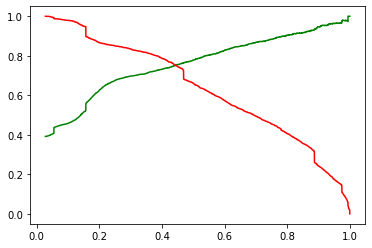

In [204]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [205]:
ytrain_pred_final['Final_Predicted'] = ytrain_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.41 else 0)
ytrain_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.156691,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.173180,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.784009,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.156691,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.054789,0,1,0,0,0,0,0,0,0,0,0,0


In [206]:
# Accuracy
metrics.accuracy_score(ytrain_pred_final['Converted'], ytrain_pred_final['Final_Predicted'])

0.8115257439773264

In [207]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(ytrain_pred_final['Converted'], ytrain_pred_final['Final_Predicted'] )
confusion2

array([[3276,  671],
       [ 526, 1878]], dtype=int64)

In [208]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [209]:
TP

1878

In [210]:
TN

3276

In [211]:
FP

671

In [212]:
FN

526

In [213]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7367595135347195

In [214]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.781198003327787

___With the current cut off as 0.41 we have Precision around 74% and Recall around 78%___

# 13. Prediction on Test set

In [215]:
# Storing prediction of test set in the variable 'y_test_pred'
ytest_pred = res.predict(xtest_sm)
# Coverting it to df
ypred_df = pd.DataFrame(ytest_pred)
# Converting y_test to dataframe
ytest_df = pd.DataFrame(ytest)
# Remove index for both dataframes to append them side by side 
ypred_df.reset_index(drop=True, inplace=True)
ytest_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
ypred_final = pd.concat([ytest_df, ypred_df],axis=1)
# Renaming column 
ypred_final= ypred_final.rename(columns = {0 : 'Conversion_Prob'})
ypred_final.head()

,Converted,Conversion_Prob
0,1,0.883375
1,0,0.114067
2,1,0.154895
3,1,0.885967
4,0,0.129030


In [216]:
# Making prediction using cut off 0.41
ypred_final['Final_Predicted'] = ypred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.41 else 0)
ypred_final

,Converted,Conversion_Prob,Final_Predicted
0,1,0.883375,1
1,0,0.114067,0
2,1,0.154895,0
3,1,0.885967,1
4,0,0.129030,0
...,...,...,...
2718,0,0.014480,0
2719,1,0.961305,1
2720,0,0.188308,0
2721,1,0.997403,1


In [217]:
# Check the overall accuracy
metrics.accuracy_score(ypred_final['Converted'], ypred_final['Final_Predicted'])

0.8013220712449505

In [218]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(ypred_final['Converted'], ypred_final['Final_Predicted'] )
confusion2

array([[1369,  323],
       [ 218,  813]], dtype=int64)

In [219]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [220]:
TP

813

In [221]:
TN

1369

In [222]:
FP

323

In [223]:
FN

218

In [224]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.715669014084507

In [225]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7885548011639185

___With the current cut off as 0.41 we have Precision around 71% and Recall around 78%___

# Conclusion